Author: Denis

# 3. Reading and writing files

### Goals

- reading the atom coordinates from a PDB file
- output value tables to a text file
- learning to do calculations with *numpy arrays*
- first plotting with *matplitlib*

### Introduction

#### ATOM data in PDB files

The PDB file format contains information about atom species and positions. This information is found in lines starting with ``ATOM``. Each of these lines has the same amount of characters and has the following format:

| Characters | Type                                  | Data type        |       
|------------|---------------------------------------|------------------|
| 1 - 6      | Record name «ATOM»                    | String           |
| 7-11       | Serial atom number                    | Integer          |
| 13-16      | Atom name                             | String           |
| 17         | Alternate location                    | String           |
| 18-20      | Residue name                          | String           |
| 22         | Chain identifier                      | String           |
| 23-26      | Residue sequence nb.                  | Integer          |
| 27         | Code for residues insertion           | String           |
| 31-38      | X coordinate in Å                     | Float            |
| 39-46      | Y coordinate in Å                     | Float            |
| 47-54      | Z coordinate in Å                     | Float            |
| 55-60      | Occupancy                             | Float            |
| 61-66      | Temperature factor                    | Float            |
| 77-78      | Element symbol                        | String           |
| 79-80      | Charge                                | String           |

Further reading: http://www.wwpdb.org/documentation/file-format-content/format33/v3.3.html

**Note:** With PDB files, splitting the lines in their individual columns using the function ``line.split()`` is dangerous: use character positions instead!

### *TASK 1*

In this folder you will find the PDB file for Proaerolysin (``1PRE.pdb``). Open the file, and print all the lines containing a cysteine (residue name "CYS"). 

**Note:** Remember that in *Python* one starts counting from 0, not 1!

In [1]:
def cys_line_printer():
    with open("1PRE.pdb", "r") as file1:
        for line in file1:
            if line[17:20] == "CYS":
                print(line)
cys_line_printer()

ATOM    136  N   CYS A  19      13.459  82.830  23.230  1.00 33.86           N  

ATOM    137  CA  CYS A  19      12.542  81.712  23.122  1.00 33.54           C  

ATOM    138  C   CYS A  19      11.546  81.890  21.995  1.00 34.09           C  

ATOM    139  O   CYS A  19      11.397  82.988  21.465  1.00 34.19           O  

ATOM    140  CB  CYS A  19      11.740  81.685  24.443  1.00 32.44           C  

ATOM    141  SG  CYS A  19      12.815  81.107  25.800  1.00 31.70           S  

ATOM    561  N   CYS A  75      13.304  76.650  26.884  1.00 28.69           N  

ATOM    562  CA  CYS A  75      12.218  77.532  27.304  1.00 30.01           C  

ATOM    563  C   CYS A  75      11.060  76.742  27.879  1.00 30.85           C  

ATOM    564  O   CYS A  75      11.022  75.512  27.695  1.00 31.27           O  

ATOM    565  CB  CYS A  75      11.760  78.281  26.056  1.00 30.28           C  

ATOM    566  SG  CYS A  75      13.153  79.155  25.299  1.00 30.92           S  

ATOM   1211  N  

### *TASK 2*

Parse ``1PRE.pdb`` and write the $x$, $y$ and $z$ coordinates of all the cysteines to the output file ``atoms_cys.txt``. Use [*f-strings*](https://www.blog.pythonlibrary.org/2018/03/13/python-3-an-intro-to-f-strings/) to generate one string for each line ending with a newline character ``\n``.

**Advanced:** Make sure that columns are aligned.

In [2]:
def cys_parser():
     with open("1PRE.pdb", "r") as file:
            lines1 = []
            for line1 in file:
                if line1[17:20] == "CYS":
                    lines1.append(f"{line1[31:54]}\n")
            lines1[-1] = lines1[-1][:-1]
            with open("atoms_cys_ds.txt", "w+") as cysatomfile:
                 cysatomfile.writelines(lines1)
cys_parser()
    

### *TASK 3*

Define a function ``read_pdb(filename)`` that expects as input parameter a PDB filename and that returns four *numpy arrays* containing
- the $x$ coordinates
- the $y$ coordinates
- the $z$ coordinates
- the atomic numbers (proton numbers)

**Advanced:** Save the function in another file called ``pdb_``*yourname*``.py``, import and call it.

In [3]:
# Import of numpy
import numpy

In [39]:
import re
def read_pdb(filename):
    with open (filename, "r") as file:
        X = []
        Y = []
        Z = []
        N = []
        atomic_number = {"C":6,"N":7,"O":8,"S":16}
        acid = input("Enter three letter code for amino acid in caps (eg ALA), enter ALL for all residue atoms: ")
        def theloop():
            for key in atomic_number:
                if re.search(key, b):
                    X.append(float(line2[31:38]))
                    Y.append(float(line2[38:46]))
                    Z.append(float(line2[46:54]))
                    N.append(atomic_number[key])
            return X, Y, Z, N
        for line2 in file:
            b = line2[76:78]
            if re.search("ATOM", line2[0:5]):
                if line2[17:20] == acid: ##optional to do only CYS atoms
                    theloop()
                elif acid == "ALL":
                    theloop()
        Xar = numpy.array(X)
        Yar = numpy.array(Y)
        Zar = numpy.array(Z)
        Nar = numpy.array(N)
        print(f"X coordinates= {Xar}\nY coordinates= {Yar}\nZ coordinates= {Zar}\nAtomic number= {Nar}") ## optional to print out results, not recommended for all atoms at once
        return [Xar, Yar, Zar, Nar]
a = read_pdb("1PRE.pdb")

Enter three letter code for amino acid in caps (eg ALA), enter ALL for all residue atoms:  ALL


X coordinates= [  5.955   5.061   5.843 ... -11.762 -11.63  -12.493]
Y coordinates= [77.192 76.43  75.299 ... 76.732 76.829 78.663]
Z coordinates= [41.9   40.975 40.293 ... 43.104 41.859 44.602]
Atomic number= [7 6 6 ... 6 8 6]


### *TASK 4*

Use the *matplotlib* function [*matplotlib.pyplot.scatter* ](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html) to visualise the $x$ and $y$ coordinates of Proaerolysin.

**Advanced:** Plot each element in a different color.

In [42]:
# Magic import of the matplotlib package for activating plotting in the notebook
import matplotlib
%matplotlib inline

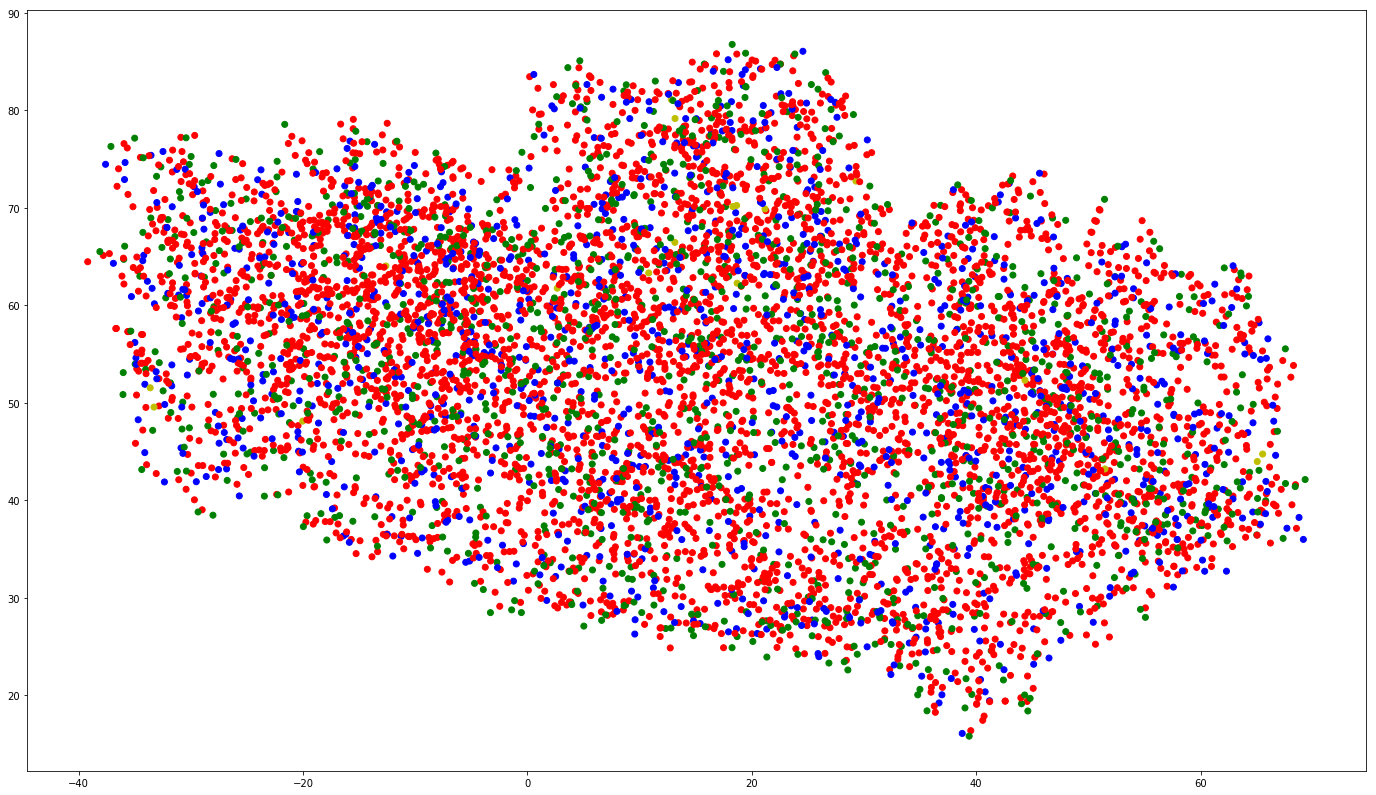

In [52]:
def plot_xycoord(g):
    colour = []
    for i in g[3]:
        if i == 6:
            colour.append('r')
        elif i == 7:
            colour.append('b')
        elif i == 8:
            colour.append('g')
        elif i == 16:
            colour.append('y')
        else:
            print("Unknown element")
    matplotlib.pyplot.figure(figsize=(24,14))
    matplotlib.pyplot.scatter(g[0], g[1], c=colour)
    
    
plot_xycoord(a)

### *EXTRA TASK*

The radius of gyration of a molecule of $N$ atoms is defined as
    
$$R_g = \sqrt{\frac{\sum_i^N m_i r_i^2}{\sum_i^N m_i}}$$

where $m_i$ is mass of atom $i$ and $r_i$ is the distance of atom $i$ from the molecule's center of mass

$$\vec{r_0} = \frac{\sum_i^N m_i \vec{r_i}}{\sum_i^N m_i}$$

Estimate the size of Proaerolysin by calculating the radius of gyration on the basis of only its carbon atoms.

**Advanced:** Consider atoms of all elements for this calculation.

In [25]:
# TYPE YOUR SOLUTION HERE